<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/2k_fractional_factorial_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Python notebook demonstrates the computation of one-half fractional Two-Level factorial experimental analysis with k=4. 
The dat set comes with the center points. We will just filter out these points and use one half or the 16 factoral points. The example is from Montgomery Intro to SQC (7th ed chap 13 Ex 13.10 Etch Rate Experiment).  Ref.
https://www.statsmodels.org/stable/regression.html#examples

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 


In [1]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#use theread option where the data file is rignt under your default google drive directory
#note that the path is case sensitive
#use a text editor such as notepad to see the seperator dividing data
#go the 1st read option for local file: see the Read data from local file notebook for an example
# Four Factors A-D and the response is Etch Rate
# the run_oder is the order when the combination was experimented which will be used for plotting residuals
# the experiments also include four center points
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/EX%2013.8%20Etch%20Rate%20k%3D4%20cpts.csv', sep=',', na_values=".")

data  

,stand_order,run_order,A_Gap,B_Pressure,C_Flow,D_Power,EtchRate
0,1,10,-1,-1,-1,-1,550
1,2,13,1,-1,-1,-1,669
2,3,7,-1,1,-1,-1,604
3,4,3,1,1,-1,-1,650
4,5,9,-1,-1,1,-1,633
5,6,14,1,-1,1,-1,642
6,7,1,-1,1,1,-1,601
7,8,11,1,1,1,-1,635
8,9,16,-1,-1,-1,1,1037
9,10,4,1,-1,-1,1,749


In [3]:
# this step is not necessay if the input data set is already fractional design

data2=data
x1x2x3x4=data['A_Gap'] * data['B_Pressure'] *data['C_Flow'] * data['D_Power']
data2['ABCD']=x1x2x3x4
data2

,stand_order,run_order,A_Gap,B_Pressure,C_Flow,D_Power,EtchRate,ABCD
0,1,10,-1,-1,-1,-1,550,1
1,2,13,1,-1,-1,-1,669,-1
2,3,7,-1,1,-1,-1,604,-1
3,4,3,1,1,-1,-1,650,1
4,5,9,-1,-1,1,-1,633,-1
5,6,14,1,-1,1,-1,642,1
6,7,1,-1,1,1,-1,601,1
7,8,11,1,1,1,-1,635,-1
8,9,16,-1,-1,-1,1,1037,-1
9,10,4,1,-1,-1,1,749,1


In [4]:
# this step is not necessay if the input data set is already fractional design
# ascending=1 is true and 0 is false
# two columns are used for sorting then ascending=[1,0] first column ascending and 2nd column decending
data2=data2.sort_values(['ABCD'], ascending=0) #sorting in decending order of the design generator
data2=data2[0:8] #pick the first 8 obs for the first block I=ABCD
data2

,stand_order,run_order,A_Gap,B_Pressure,C_Flow,D_Power,EtchRate,ABCD
0,1,10,-1,-1,-1,-1,550,1
6,7,1,-1,1,1,-1,601,1
15,16,2,1,1,1,1,729,1
12,13,6,-1,-1,1,1,1075,1
9,10,4,1,-1,-1,1,749,1
10,11,15,-1,1,-1,1,1052,1
5,6,14,1,-1,1,-1,642,1
3,4,3,1,1,-1,-1,650,1


In [5]:
#full data set into df
#df means data frame
# here you can choose data for the full factorial (df=data) or df=data2 for the 1/2 fractional factorial

df=data2 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 3
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   stand_order  8 non-null      int64
 1   run_order    8 non-null      int64
 2   A_Gap        8 non-null      int64
 3   B_Pressure   8 non-null      int64
 4   C_Flow       8 non-null      int64
 5   D_Power      8 non-null      int64
 6   EtchRate     8 non-null      int64
 7   ABCD         8 non-null      int64
dtypes: int64(8)
memory usage: 576.0 bytes


In [6]:
Xmain=df[['A_Gap', 'B_Pressure', 'C_Flow', 'D_Power']]
Xmain

,A_Gap,B_Pressure,C_Flow,D_Power
0,-1,-1,-1,-1
6,-1,1,1,-1
15,1,1,1,1
12,-1,-1,1,1
9,1,-1,-1,1
10,-1,1,-1,1
5,1,-1,1,-1
3,1,1,-1,-1


In [7]:
# convert x1 and x2 input columns into a 2nd order polynomial matrix with intercept column 
# computation is done in numpy and convert it into Panda dataframe
# eventhough you can generate the full model, the factional design won't allow you to fit every term
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])
# if the full model is designed then x1x2x3x4 should be added, otherwise leave it out
# xxpd['x1x2x3x4']=x1x2x3x4
xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0
4,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
5,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
6,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
7,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0


Note that the x1^2 and X2^2 columns are all 1s. This phenomial is due the lack of center points and middle level points in the design matrix X. We will introduce a CCD (central composite design) to take care of it.

In [8]:
# reduce model 1 using main effect and some two-way interactions 
# in the case of 1/2 factional design, make sure the degree of freedom can fit the terms
# predicted response using skleran LinearRegression fit
#X=xxpd.drop(columns=['I'])
X=xxpd[['x1','x2','x3','x4', 'x1x4']]
Y=df[['EtchRate']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
data2['residual1']=eij

[[-17.75]
 [ 17.75]
 [-17.75]
 [  7.75]
 [ 17.75]
 [ -7.75]
 [ -7.75]
 [  7.75]]


In [9]:
# use statsmodels for OLS fitting and t statistics
# in this case, X is xxpd with the first column I
X=xxpd[['I','x1','x2','x3','x4','x1x4']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     74.47
Date:                Mon, 10 Oct 2022   Prob (F-statistic):             0.0133
Time:                        13:20:07   Log-Likelihood:                -32.288
No. Observations:                   8   AIC:                             76.58
Df Residuals:                       2   BIC:                             77.05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I            756.0000      9.684     78.066      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [10]:
res.resid

0   -17.75
1    17.75
2   -17.75
3     7.75
4    17.75
5    -7.75
6    -7.75
7     7.75
dtype: float64

In [11]:
# Reduced model 2 with only factors A, D, and AD 
X=xxpd[['x1','x4','x1x4']]
Y=df[['EtchRate']]
Y=Y.to_numpy() # OLS will match index for panda dataframe so converting it to numpy array
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x1','x4','x1x4']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())
Yhat2=regr2.predict(X)
eij2=Y-Yhat2
print(eij2)
data2['residual2']=eij2


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     207.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           7.66e-05
Time:                        13:20:07   Log-Likelihood:                -33.009
No. Observations:                   8   AIC:                             74.02
Df Residuals:                       4   BIC:                             74.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I            756.0000      7.494    100.884      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [12]:
data2

,stand_order,run_order,A_Gap,B_Pressure,C_Flow,D_Power,EtchRate,ABCD,residual1,residual2
0,1,10,-1,-1,-1,-1,550,1,-17.75,-25.5
6,7,1,-1,1,1,-1,601,1,17.75,25.5
15,16,2,1,1,1,1,729,1,-17.75,-10.0
12,13,6,-1,-1,1,1,1075,1,7.75,11.5
9,10,4,1,-1,-1,1,749,1,17.75,10.0
10,11,15,-1,1,-1,1,1052,1,-7.75,-11.5
5,6,14,1,-1,1,-1,642,1,-7.75,-4.0
3,4,3,1,1,-1,-1,650,1,7.75,4.0


Note that reduced model 2 has larger residual than those of reduced model 1 which has more data

In [13]:
# this step is not necessary for 1/2 fractional design analysis
#compute the MSE using pure error (i.e. repteated obs at center points)
# this cell verify the result in the next cell
ydata0=[706, 764,780,761]
mspe=statistics.variance(ydata0)
print(mspe)

1040.9166666666667


In [14]:
# obtain the beta coefficients
beta=regr.coef_
betas=beta.flatten()
print('reduce model 1 betas,', betas)

beta2=regr2.coef_
betas2=beta2.flatten()
print('reduce model 2 betas,', betas2)


reduce model 1 betas, [-63.5    2.     5.75 145.25 -98.75]
reduce model 2 betas, [-63.5  145.25 -98.75]


In [15]:
#
# reduced model 1 main + some 2-way interactions: SS computation
#
# Lack of fit = (SSe - SSpe) the unaccounted error amount after pure error
# F test for lack of fit = MSlof/MSpe
# res.resid is the residuals based on design matrix X which can be a full or reduce model

Y=df[['EtchRate']].to_numpy()
YF=Y # there is no cetner pts in fractional design
SST = sum(Y**2) - (sum(Y))**2/len(YF)

# all SS terms of main and 2-way interactions summed for SSR
SSR=sum(betas**2) * len(Y) #there is no cpts in fractional factorial
DFm= 4
DF2w=1
DFR = DFm + DF2w 
print("SS Model (reduce model 1)", SSR, "DF=", int(DFR))
SSe=SST-SSR
DFe = len(Y)-1 - DFR
print("SS Residual",SSe, "DF=", int(DFe))

print("SS Total", SST, "DF=", len(Y)-1)

SS Model (reduce model 1) 279347.5000000001 DF= 5
SS Residual [1500.5] DF= 2
SS Total [280848.] DF= 7


In [16]:
#
# Reduced model 2 with A, D, and AD
#
Y=df[['EtchRate']].to_numpy()
YF=Y # there is no cetner pts in fractional design
#SSA= sum((betas[0:3]**2) * len(YF))
SSA= (betas[0]**2) * len(YF)
SSD= (betas[1]**2) * len(YF)
SSAD= (betas[2]**2) * len(YF)

# all SS terms summed
SSR=SSA+SSD+SSAD
print("SS Model >", SSR, "DF=", 3)
print("   SSA", SSA, "DF=1")
print('   SSD', SSD, "DF=1")
print("   SSAD", SSAD, "DF=1")
SST = sum(Y**2) - (sum(Y))**2/len(Y)

SSe2=SST-SSR
print("SS Residual error",SSe2, "DF=", len(Y)-1-3)
print("SS Total",SST, "DF=", len(Y)-1)



SS Model > 32554.499999999985 DF= 3
   SSA 32257.999999999985 DF=1
   SSD 32.000000000001364 DF=1
   SSAD 264.4999999999987 DF=1
SS Residual error [248293.5] DF= 4
SS Total [280848.] DF= 7


from the t tests above, the significant factors are

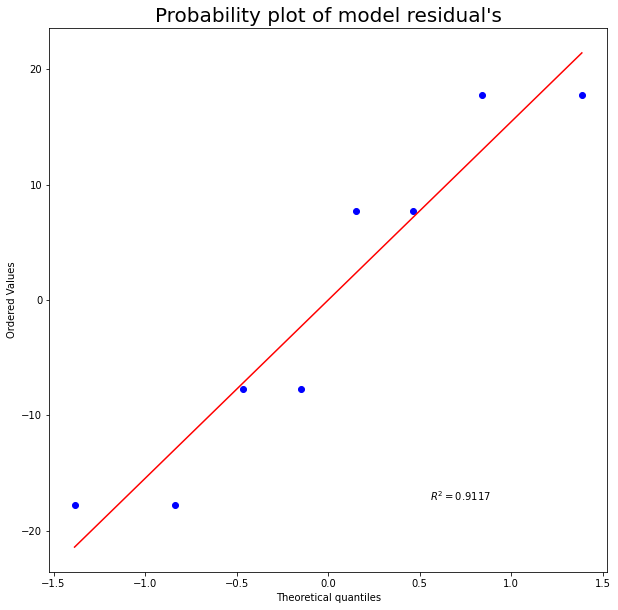

In [17]:
# Residual Analysis of the reduced model 1
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

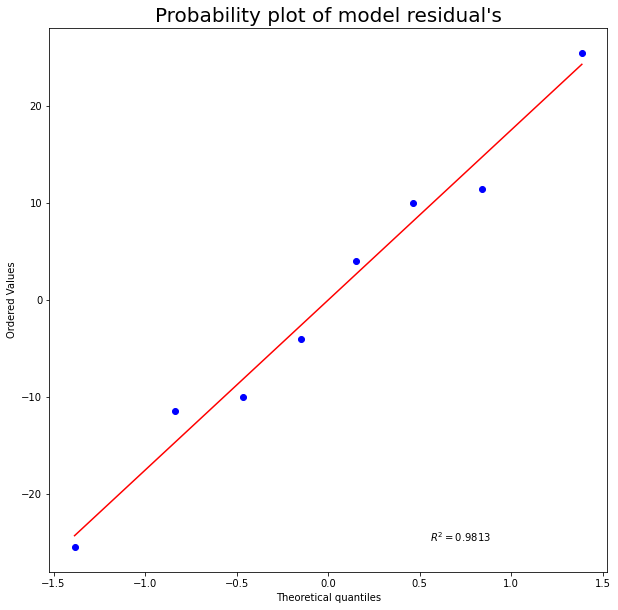

In [18]:
# Residual Analysis of the reduced model 2
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

The above probably plot shows that the residuals are not normal 

In [19]:
# Homogeneity of Variance check for Factor A
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['EtchRate'][df['A_Gap'] == -1],
             df['EtchRate'][df['A_Gap'] == 1])
            

LeveneResult(statistic=230.69245933957615, pvalue=5.139521950313582e-06)

Since p value is very small, we reject that factor A has equal variance

In [20]:
# Homogeneity of Variance check for Factor D
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['EtchRate'][df['D_Power'] == -1],
             df['EtchRate'][df['D_Power'] == 1])

LeveneResult(statistic=85.58390448817157, pvalue=9.01188547674458e-05)

Since p value is very small, we reject that factor D has equal variance

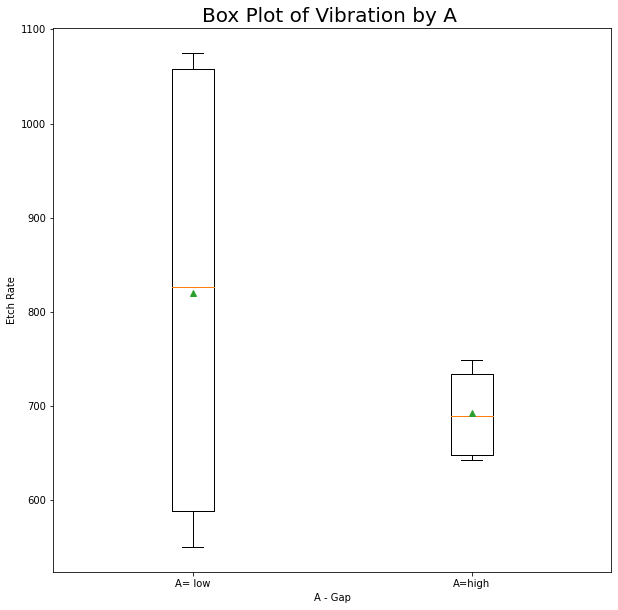

In [21]:
# Box plots by factor A'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A ", fontsize= 20)
ax.set

boxdata= [df['EtchRate'][df['A_Gap'] == -1],
             df['EtchRate'][df['A_Gap'] == 1]]


ax.boxplot(boxdata,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Gap")
plt.ylabel("Etch Rate")

plt.show()

There is not much difference in variation. The largest adhesion strength is due to type 2 primer type.

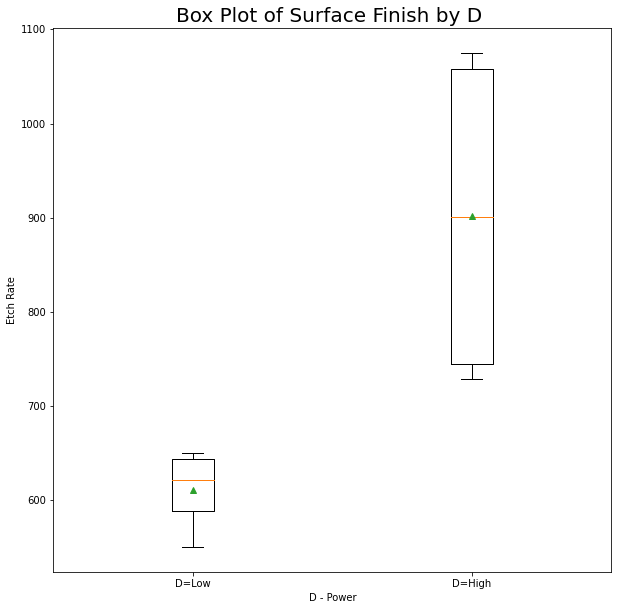

In [22]:
# Box plots by factor D
# same instruction as the previous factor 

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Surface Finish by D ", fontsize= 20)
ax.set

boxdata2 = [df['EtchRate'][df['D_Power'] == -1],
         df['EtchRate'][df['D_Power'] == +1]]


ax.boxplot(boxdata2,
           labels= ['D=Low', 'D=High'],
           showmeans= True)

plt.xlabel("D - Power")
plt.ylabel("Etch Rate")

plt.show()

There is not much difference in variation by application method. The largest adhesion strength is due to spraying method.

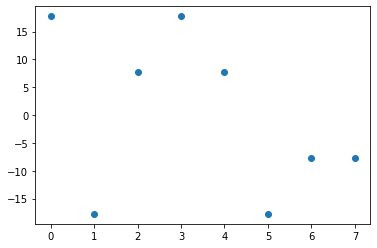

In [23]:
# independence check for model 1 
# Use the run order to reflect the sequence that we collected the data 
# if there is no pattern in the scatter plot, then don't reject independence assumption

eij=res2.resid
N=len(eij)

x = [i for i in range(N)] # from the first collected obs to the last in order
data3=data2.sort_values(['run_order'], ascending=1)
y = data3['residual1']  # arrange the residuals using run_order

plt.scatter(x, y)

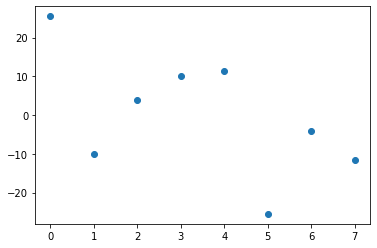

In [24]:
# independence check for model 2
# Use the run order to reflect the sequence that we collected the data 
# if there is no pattern in the scatter plot, then don't reject independence assumption


x = [i for i in range(N)] # from the first collected obs to the last in order
data3=data2.sort_values(['run_order'], ascending=1)
y = data3['residual2']  # arrange the residuals using run_order

plt.scatter(x, y)

The random order from the scatter plot above shows some concern because all residual of early runs are larger than 0 except for the 2nd obs but last three runs are below zero. However the overall pattern is random.
